# AutoEncoder
[link](https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798)  

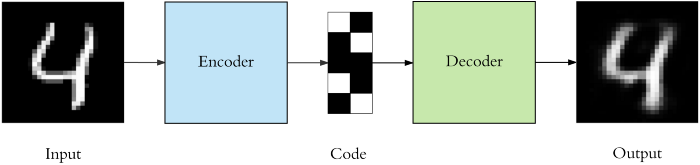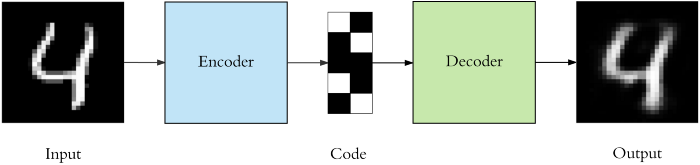

## Main Idea
The auto-encoder aims at providing the a low-dimension representation (code in fig above) for high dimension input. To build an autoencoder we need 3 things: an encoding method, decoding method, and a loss function to compare the output with the target. 

## Example with MNIST

In [3]:
from res.autoencoder_utils.mnist import read_data

(x_train, y_train), (x_test, y_test) = read_data()
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Autoencoder

In [9]:
from keras.models import Model
from keras.layers import Dense, Input

input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1383
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0937


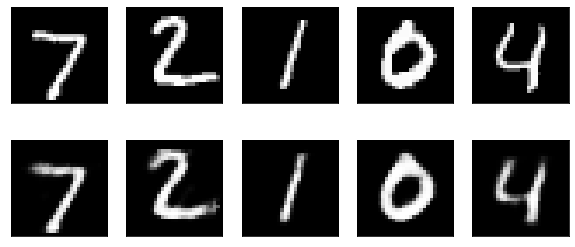

In [10]:
from res.autoencoder_utils.plot import plot_autoencoder_outputs

plot_autoencoder_outputs(autoencoder, x_test, 5, (28, 28))

## Denoising Autoencoder

In [13]:
from res.autoencoder_utils.mnist import add_noise
import numpy as np

x_train_noisy = add_noise(x_train, 0.5)
x_test_noisy = add_noise(x_test, 0.5)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

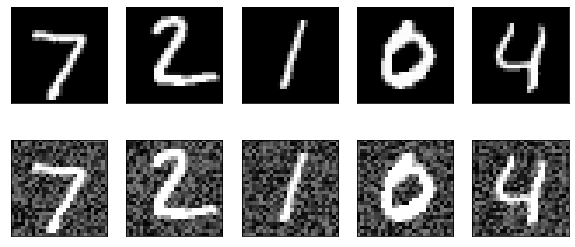

In [15]:
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [16]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1543
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1147
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1086
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1059
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1041
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1002
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0995
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0989A: 0s - l


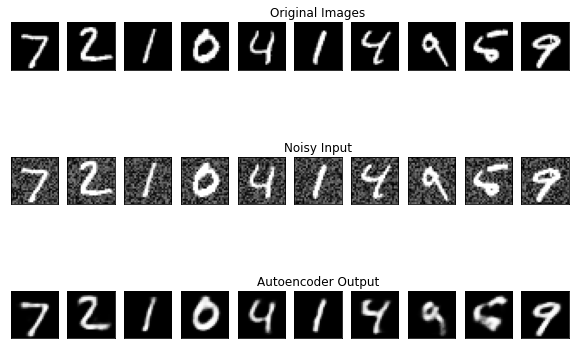

In [20]:
n = 10
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')